In [3]:
## Week 2 Assignment

In [4]:
### This data set provides information on the pollution burden score across California. The pollution burden score 
### is an index ranging from 0.1 to 10 that measures potential exposure to pollutants and adverse environmental 
### conditions. The data can showcase which geographic areas across the state are most affected by pollition. 

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
# Just like Week 2 lab, I imported the geopandas module, which is a good tool to use for spatial analysis and 
# allows us to import spatial data formats. 

In [7]:
# Now I will import, read and add the csv file to this notebook.

In [8]:
pollutionindex = pd.read_csv("All Years Pollution Burden Calculations.csv")

In [9]:
# Now I will check to see if the data was imported correctly by checking the first 5 rows

In [10]:
pollutionindex.head()

geoid     geoid20  year  denom_total_pop  \
0  1400000US06037101110  6037101110  2021             4283   
1  1400000US06037101122  6037101122  2021             3405   
2  1400000US06037101220  6037101220  2021             3702   
3  1400000US06037101221  6037101221  2021             3455   
4  1400000US06037101222  6037101222  2021             2892   

   pollution_burden_score  
0                    4.27  
1                    3.76  
2                    4.61  
3                    4.24  
4                    4.24

In [11]:
# Let me take a step back, and also look at the type of data that this data set titled 
# pollutionindex is 

In [12]:
type(pollutionindex)

pandas.core.frame.DataFrame

In [13]:
# I am also going to look at the last 5 rows of this data frame using the tail function

In [14]:
pollutionindex.tail()

geoid     geoid20  year  denom_total_pop  \
7474  1400000US06037980035  6037980035  2014             6690   
7475  1400000US06037980036  6037980036  2014             7785   
7476  1400000US06037980037  6037980037  2014             2786   
7477  1400000US06037980038  6037980038  2014             5199   
7478  1400000US06037980039  6037980039  2014              157   

      pollution_burden_score  
7474                8.620000  
7475                8.729999  
7476                6.410000  
7477                7.490000  
7478                6.990000

In [15]:
# I am also interested in looking at how many data entries are shown in this data frame using
# the info function since this dataset does not have as many columns or rows of information 

In [16]:
pollutionindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geoid                   7479 non-null   object 
 1   geoid20                 7479 non-null   int64  
 2   year                    7479 non-null   int64  
 3   denom_total_pop         7479 non-null   int64  
 4   pollution_burden_score  7479 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 292.3+ KB


In [17]:
# Let's continue the data exploration by taking a look at the shape function which allows 
# us to see the data dimensions of our data set's columns and rows

In [18]:
pollutionindex.shape

(7479, 5)

In [19]:
# This data set is definitely unique in that it has little columns, let's see what the are using 
# the columns function

In [20]:
pollutionindex.columns.to_list()

['geoid', 'geoid20', 'year', 'denom_total_pop', 'pollution_burden_score']

In [21]:
# I will to continue looking into how to get values from these single columns function

In [22]:
pollutionindex['pollution_burden_score'].sample(5)

1522    7.10
5799    6.79
4548    6.39
2798    5.59
7265    5.45
Name: pollution_burden_score, dtype: float64

In [23]:
# Assuming pollution burden score in the data is regarding the city/location, 
# lets see how many there are 

In [24]:
pollutionindex['pollution_burden_score'].value_counts()

6.12    35
6.08    35
6.42    35
6.26    34
5.59    34
        ..
3.74     1
8.78     1
8.74     1
3.77     1
2.39     1
Name: pollution_burden_score, Length: 707, dtype: int64

In [25]:
# Let me try and save this as a variable similar to our Week 2 lab

In [26]:
pollution_score = pollutionindex['pollution_burden_score'].value_counts()

In [27]:
pollution_score

6.12    35
6.08    35
6.42    35
6.26    34
5.59    34
        ..
3.74     1
8.78     1
8.74     1
3.77     1
2.39     1
Name: pollution_burden_score, Length: 707, dtype: int64

In [28]:
# Now we will see what data type pollution_score using the type function again

In [29]:
type(pollution_score)

pandas.core.series.Series

In [30]:
# Plotting this data column would be interesting to see, let's run it using the plot function

<AxesSubplot: >

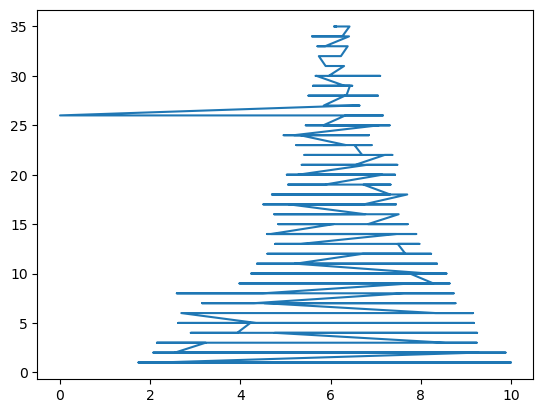

In [31]:
pollution_score.plot()

In [32]:
# It seems like this doesn't give much information, as most geoids are similar in number, 
# and it does not any information on actual pollution trends within these cities 

<AxesSubplot: title={'center': 'Pollution Index Locations'}>

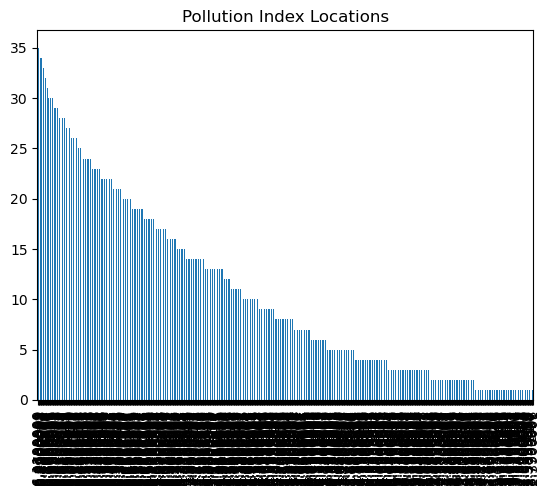

In [33]:
pollution_score.plot.bar(x='', y='count', title='Pollution Index Locations')

In [34]:
# A bar plot is overwhelming for this type of data, we need to look at trimming to get a 
# better visual representation for spatial analysis 

In [89]:
pollutionindex[['geoid','geoid20','pollution_burden_score']]

geoid     geoid20  pollution_burden_score
0     1400000US06037101110  6037101110                4.270000
1     1400000US06037101122  6037101122                3.760000
2     1400000US06037101220  6037101220                4.610000
3     1400000US06037101221  6037101221                4.240000
4     1400000US06037101222  6037101222                4.240000
...                    ...         ...                     ...
7474  1400000US06037980035  6037980035                8.620000
7475  1400000US06037980036  6037980036                8.729999
7476  1400000US06037980037  6037980037                6.410000
7477  1400000US06037980038  6037980038                7.490000
7478  1400000US06037980039  6037980039                6.990000

[7479 rows x 3 columns]

In [90]:
# I am going to use the desired columns function like in the Week 2 lab to ensure the columns I want to concentrate
# on are listed

In [92]:
desired_columns = ['geoid','geoid20','pollution_burden_score']

In [93]:
pollutionindex[desired_columns].sample(5)

geoid     geoid20  pollution_burden_score
6941  1400000US06037570701  6037570701                    6.49
3528  1400000US06037276605  6037276605                    5.51
2211  1400000US06037651401  6037651401                    5.43
492   1400000US06037192300  6037192300                    6.34
4605  1400000US06037602510  6037602510                    7.43

In [94]:
# Now that I have trimmed the data, I want to make sure that we preserve this trimmed version of the dataset 

In [95]:
pollutionindex_trimmed = pollutionindex[desired_columns].copy()

In [96]:
pollutionindex_trimmed

geoid     geoid20  pollution_burden_score
0     1400000US06037101110  6037101110                4.270000
1     1400000US06037101122  6037101122                3.760000
2     1400000US06037101220  6037101220                4.610000
3     1400000US06037101221  6037101221                4.240000
4     1400000US06037101222  6037101222                4.240000
...                    ...         ...                     ...
7474  1400000US06037980035  6037980035                8.620000
7475  1400000US06037980036  6037980036                8.729999
7476  1400000US06037980037  6037980037                6.410000
7477  1400000US06037980038  6037980038                7.490000
7478  1400000US06037980039  6037980039                6.990000

[7479 rows x 3 columns]

In [97]:
# Since my data is mostly numerical, I tried to query for a pollution_burden_score above a 4.24 but it appears the 
# table did not populate

In [98]:
pollutionindex_trimmed[pollutionindex_trimmed.pollution_burden_score == '4.240000']

Empty DataFrame
Columns: [geoid, geoid20, pollution_burden_score]
Index: []

In [99]:
# The last thing I want to try is plotting the bigger data set using the plot command 

<AxesSubplot: >

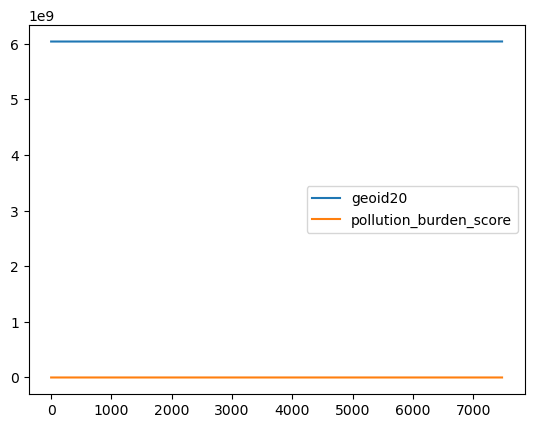

In [100]:
pollutionindex_trimmed.plot()

In [109]:
# Let's try adding more specific information, it looks like the plot function is not registering the geoids 

<AxesSubplot: title={'center': 'Pollution Index CA'}, xlabel='geoid'>

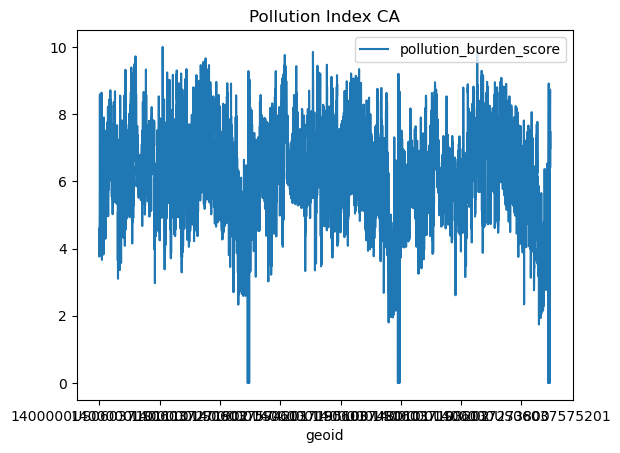

In [112]:
pollutionindex_trimmed.plot(x='geoid', y='pollution_burden_score', title='Pollution Index CA')

In [113]:
# Hmmm not the prettiest graph either, and it does not give much of any information on pollution trends within
# the geoids. The next step would be to find data that has identifies CA geoid, and import that data or find a data 
# set with geometry 